# Unsupervised Analysis of Days of Week

This is reprodcution of Jake Vanderplas "Reproducible Data Analysis in Jupyter", except I have some more steps for my understanding

This exercies is excelant resource to learn:
1. loading data from public API in pandas data frame after some clean ups.
2. **Unit testing 
3. Cleaning and refactoring for sppeding
4. Basic unsupervised lerning
5. Exception handleing
6. Linearizing the notebook

This exercise analyse the bicycle traffic pattern in Fremont bridge in CA.

His Youtupe lectures can be found here:
https://www.youtube.com/watch?v=_ZEWDGpM-vM&t=5s

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

#data URL: https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
Follwing class is get the data, merge east and west, then return and pandas.DataFrame


In [13]:
from data import get_fremont_data

In [14]:
help(get_fremont_data)

Help on function get_fremont_data in module data:

get_fremont_data(filename='Fremont.csv', url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', force_download=False)
    Download the Fremont data from API
    
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data
    
    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data



In [17]:
%ls

Fremont.csv                 __pycache__/
UnsupervisedAnalysis.ipynb* data.py*


In [15]:
data = get_fremont_data()

In [16]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


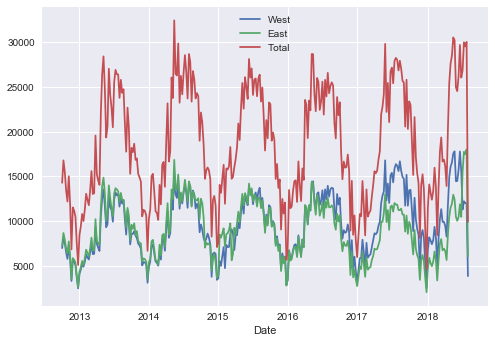

In [21]:
data.resample('w').sum().plot()

(0, 1077645.85)

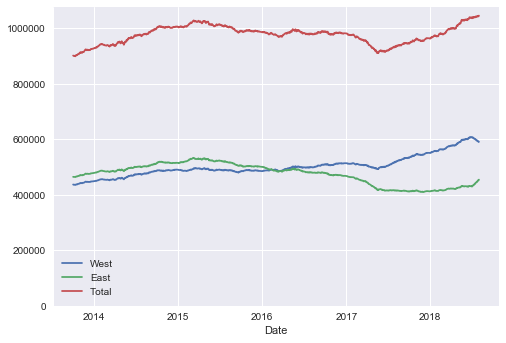

In [24]:
ax=data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0)

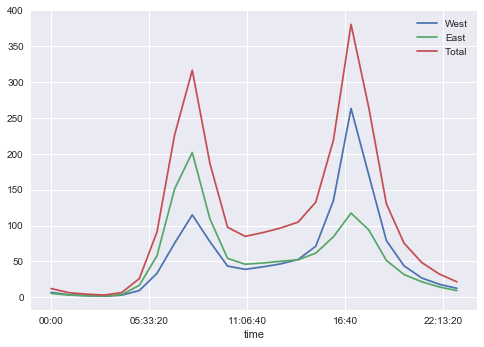

In [25]:
data.groupby(data.index.time).mean().plot()

So we East peaks in the morning (going to city) and West peak in the evening, a commute patter.

Plot shows higher trend in summer months and less hits in winter months.

In [28]:
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.head()

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2018-07-22,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-28,2018-07-29,2018-07-30,2018-07-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,20.0,5.0,6.0,17.0,7.0,11.0,21.0,27.0,5.0,8.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,11.0,9.0,4.0,5.0,6.0,13.0,21.0,16.0,9.0,8.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,3.0,5.0,3.0,10.0,3.0,5.0,4.0,14.0,4.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,4.0,4.0,4.0,5.0,3.0,6.0,8.0,8.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,10.0,14.0,15.0,17.0,13.0,12.0,6.0,12.0,15.0,16.0


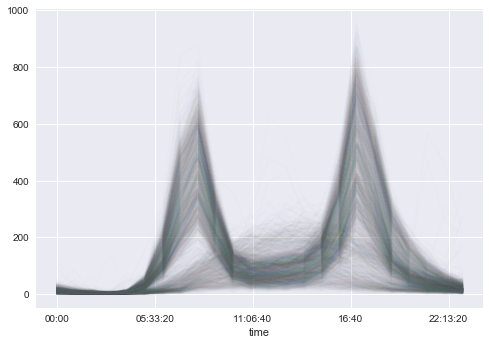

In [29]:
pivoted.plot(legend=False, alpha=0.01);

Lines for each day in 5 years, we can see bunch of days without regular commute pattern, So it can be regular week days with two peaks and weekend with broad commute patern


## Principal Component Analysis

In [5]:
X = pivoted.fillna(0).T.values
X.shape

(2128, 24)

In [6]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2128, 2)

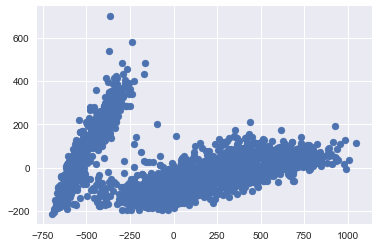

In [7]:
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsupervised Clustering

In [8]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

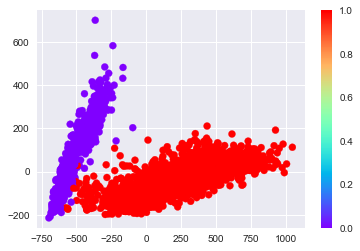

In [9]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

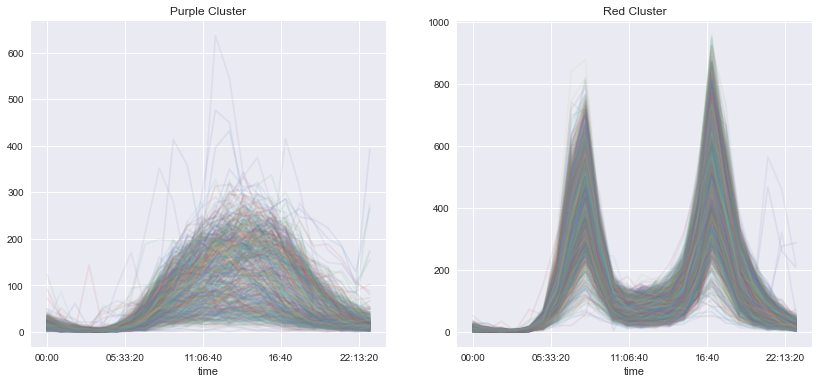

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

In [11]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

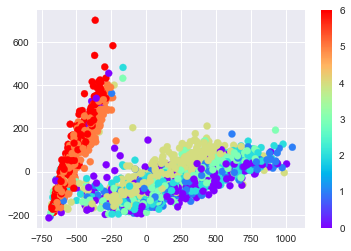

In [12]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

## Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [13]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-23',
               '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27',
               '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', length=1469, freq=None)